### 高位数据向低维数据映射

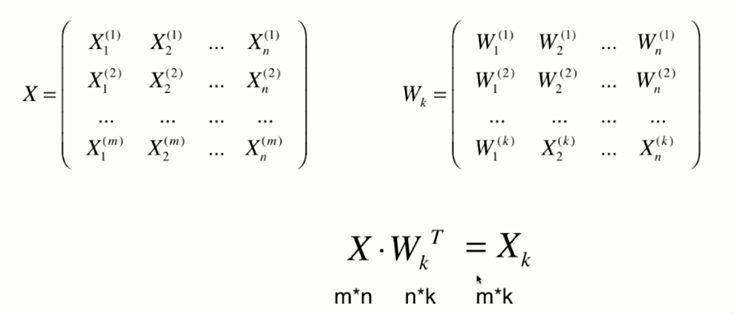

降维之后就是这样的

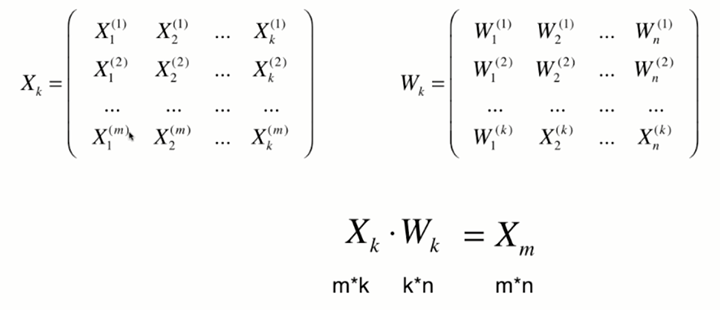

从上面的例子可以看出，降维之后的数据是可以还原的，但是已经不是以前的那个元素了

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0, 100, size=100)
X[:,1] = 0.75 *X[:,0] +3 + np.random.normal(0, 10, size=100)

In [3]:
class PCA():

    def __init__(self, n_components):
        """初始化PCA"""
        assert n_components >= 1, "n_components must be valid"
        self.n_components = n_components
        self.components_ = None

    def fit(self, X, eta=0.01, n_iters=1e4):
        """获得数据集X的前n个主成分"""
        assert self.n_components <= X.shape[1], \
            "n_components must not be greater than the feature number of X"

        def demean(X):
            return X - np.mean(X, axis=0)

        def f(w, X):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def direction(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.01, n_iters=1e4, epsilon=1e-8):

            w = direction(initial_w)
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)
                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break

                cur_iter += 1

            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i,:] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

        return self

    def transform(self, X):
        """将给定的X，映射到各个主成分分量中"""
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        """将给定的X，反向映射回原来的特征空间"""
        assert X.shape[1] == self.components_.shape[0]

        return X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components

In [4]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
pca.components_

array([[ 0.76179954,  0.64781283],
       [-0.64780784,  0.76180378]])

In [6]:
pca = PCA(n_components=1)

In [7]:
pca.fit(X)

PCA(n_components=1)

对数进行降维处理

In [8]:
X_reductions = pca.transform(X)

In [9]:
X_reductions.shape

(100, 1)

In [10]:
X_restore = pca.inverse_transform(X_reductions)

In [11]:
X_restore.shape

(100, 2)

绘制

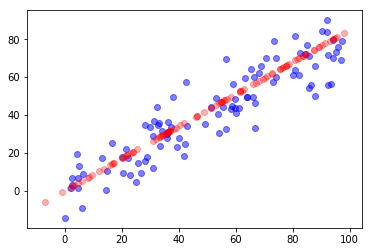

In [12]:
plt.scatter(X[:,0],X[:,1],color='b',alpha=0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha=0.3)

可以看出，数据还原之后，在一条直线上，所以说数据不能还原为原来的那个样子